# K-means Clustering

The K-Means algorithm is used to identify different training styles.

In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The marathon data that was collected is read in from the csv file. If there are any training weeks that are 0 those training cycles are removed. This is to ensure that there is a 16 week training cycle. It is accepted that there may be a week or more in the training cycle that is 0 km but this assumes an illness, injury, or other issue caused the runner to miss a training run.

Runners that had a marathon finish time exceeding 8 hours were removed as this exceeds most typical road marathon cutoff times. These marathon finish times are not typical and are likely the result of an extreme marathon or a runner with physical disabilities.

In [331]:
marathon_data = pd.read_csv(
    r"data\marathon_runners.csv", header=0).drop(columns='Unnamed: 0')
marathon_data = marathon_data.drop_duplicates()
marathon_data = marathon_data[marathon_data["week_1_total_distance"] > 0]
marathon_data = marathon_data[marathon_data["duration"] < 480].reset_index()

scaler = StandardScaler().set_output(transform="pandas")
X = marathon_data.iloc[:, 1:177]
y = marathon_data.iloc[:, 177:]
X_scaled = scaler.fit_transform(X)


The K-means algorithm is performed for K values of 1 through 10 to determine the best K value by measuring distortion and inertia. The distortion for each K value is calculated as the average of the squared distances from the cluster center of each center. The inertia is the sum of squared distances of samples to their closest cluster center. Both elbow plots don’t have a very clear indication of the K value but comparing both a K value of 5 or 6 looks to be reasonable.

In [334]:
distortions = []
inertias = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, "euclidean"), axis=1)) / X_scaled.shape[0])
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow plot using Distortions')

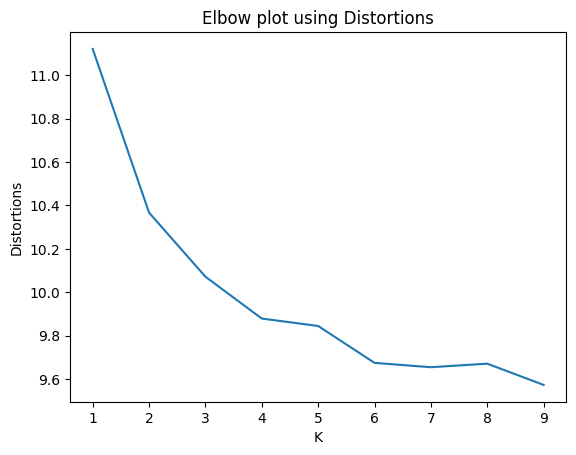

In [335]:
plt.plot(K, distortions, label="distortion")
plt.xlabel("K")
plt.ylabel("Distortions")
plt.title("Elbow plot using Distortions")


Text(0.5, 1.0, 'Elbow plot using Inertia')

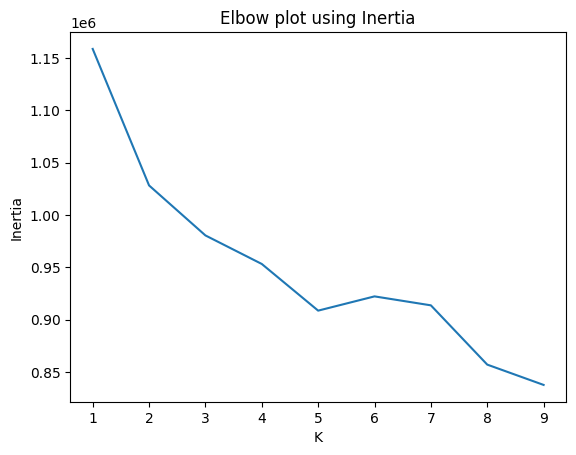

In [337]:
plt.plot(K, inertias, label="inertia")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow plot using Inertia")


Principal Component Analysis is used to visualize the data with k=5 and k=6. The majority of the clusters are along the Principal Component 1 axis.

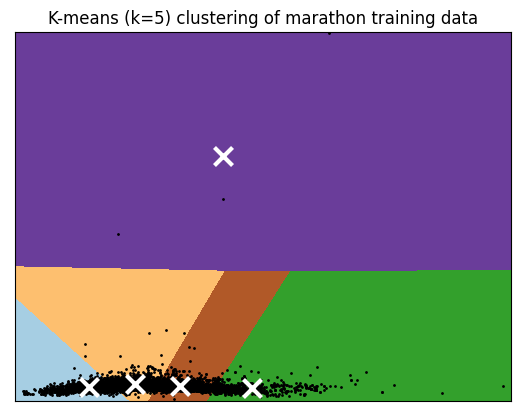

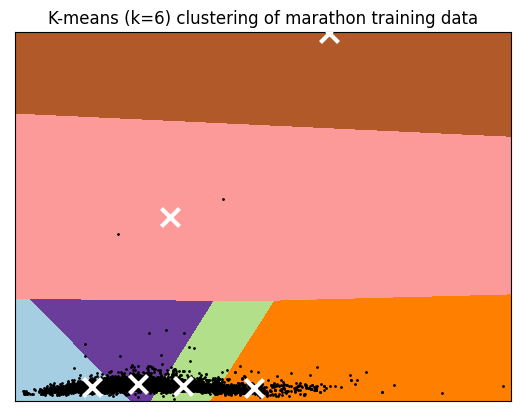

In [342]:
from sklearn.decomposition import PCA

for cluster in (5, 6):
    reduced_data = PCA(n_components=2).fit_transform(X_scaled)
    kmeans = KMeans(init="k-means++", n_clusters=cluster,
                    n_init="auto").fit(reduced_data)

    h = 0.02
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means (k={kmeans.n_clusters}) clustering of marathon training data"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
